## Question 2

Import Dataset

In [1]:
import pandas as pd

# Load the data
file_path = 'Registos_Incendios_SGIF_2011_2020.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the dataset
print(df.head())


  Codigo_SGIF  Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  AreaMato_ha  \
0      DM2111           368  2011    1    1    17         0.0        0.010   
1      BL4112          1236  2011    1    9    22         0.0        0.000   
2      DM3111           820  2011    1   15    17         0.0        0.000   
3      BL2111          1977  2011    1   18    22         0.0        0.001   
4      DM2113          7930  2011    1   19    17         0.0        0.005   

   AreaAgric_ha  AreaTotal_ha  ...       ISI         DC       DMC       FFMC  \
0       0.00000       0.01000  ...  0.291930   4.092373  0.653638  54.525424   
1       0.00200       0.00200  ...  0.013831   1.835452  0.367371  32.001278   
2       0.00001       0.00001  ...  1.171990   9.658571  1.573768  74.889775   
3       0.00000       0.00100  ...  0.248910  12.477199  0.762519  51.102608   
4       0.00000       0.00500  ...  0.008092   3.968661  0.508191  32.290416   

        BUI  CodCausa     TipoCausa  \
0  0.934234

How long do fires typically last from start to extinction? 

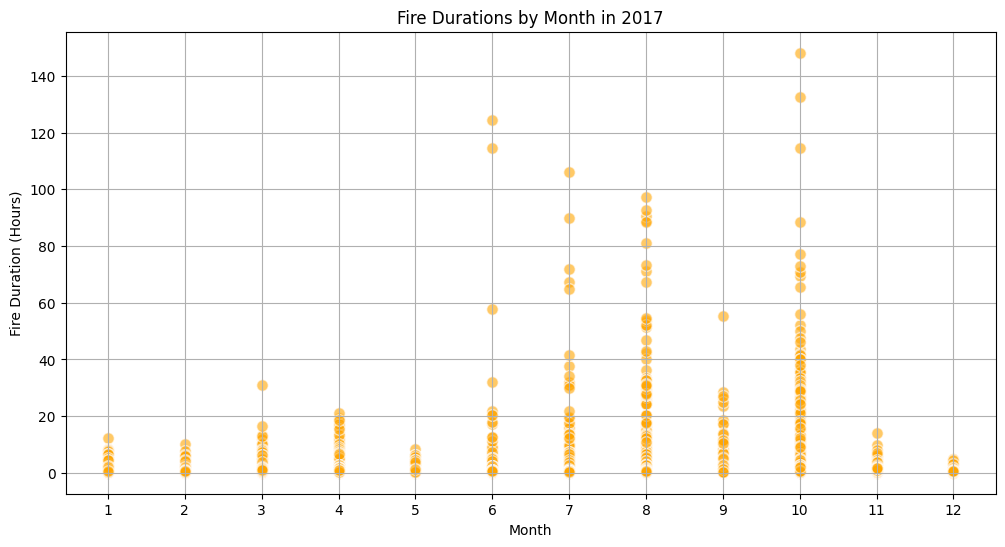

In [2]:
import matplotlib.pyplot as plt

# Drop rows with NaN values in Duracao_Horas
df = df.dropna(subset=['Duracao_Horas'])

# Extract the year and month from 'DataHoraAlerta'
df['Year'] = df['DataHoraAlerta'].dt.year
df['Month'] = df['DataHoraAlerta'].dt.month

# Filter the dataset for a specific year (e.g., 2017)
specific_year = 2017
df_specific_year = df[df['Year'] == specific_year]

# Scatter plot of fire durations by month for the specific year
plt.figure(figsize=(12, 6))
plt.scatter(df_specific_year['Month'], df_specific_year['Duracao_Horas'], color='orange', alpha=0.6, edgecolors='w', s=70)
plt.xlabel('Month')
plt.ylabel('Fire Duration (Hours)')
plt.title(f'Fire Durations by Month in {specific_year}')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

        count      mean       std       min       25%       50%       75%  \
Month                                                                       
1       793.0  1.331778  1.250030  0.066667  0.566667  1.000000  1.633333   
2       318.0  1.350472  1.198864  0.083333  0.633333  1.025000  1.683333   
3      1266.0  1.666654  1.843997  0.050000  0.650000  1.116667  1.983333   
4      2494.0  1.554959  1.793222  0.016667  0.616667  1.016667  1.800000   
5       927.0  0.948526  0.879633  0.033333  0.433333  0.700000  1.133333   
6      1870.0  1.169893  4.423358  0.016667  0.383333  0.633333  1.066667   
7      2455.0  1.278459  4.351047  0.016667  0.383333  0.633333  1.033333   
8      4223.0  1.743595  5.240462  0.016667  0.450000  0.766667  1.383333   
9      2261.0  1.088803  2.146334  0.016667  0.400000  0.666667  1.116667   
10     3232.0  2.498938  6.999143  0.016667  0.533333  0.950000  1.820833   
11      822.0  0.986638  1.047180  0.033333  0.433333  0.725000  1.166667   

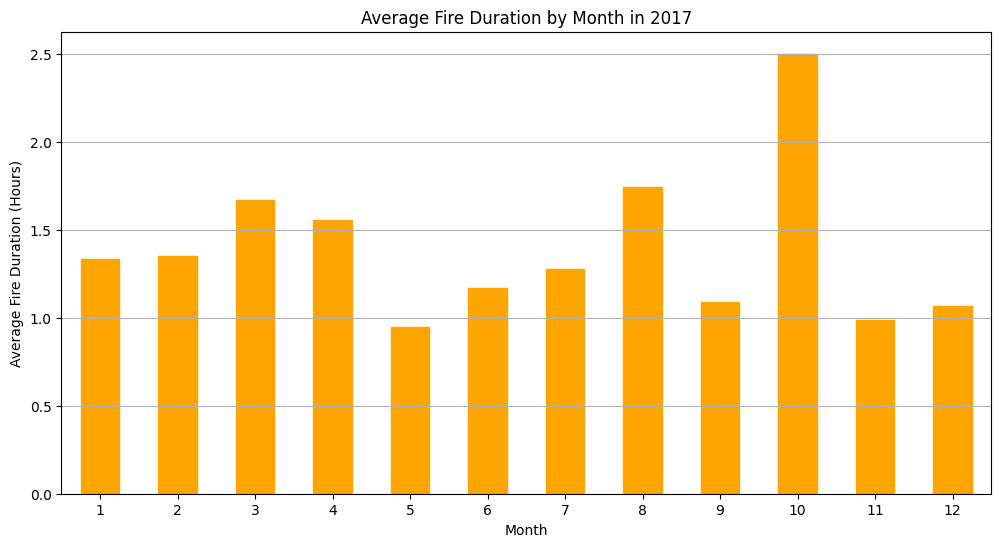

In [3]:
import matplotlib.pyplot as plt

# Drop rows with NaN values in Duracao_Horas
df = df.dropna(subset=['Duracao_Horas'])

# Filter the dataset for a specific year
specific_year = 2017
df_specific_year = df[df['Year'] == specific_year]

# Summary statistics
summary_stats = df_specific_year.groupby('Month')['Duracao_Horas'].describe()
print(summary_stats)

# Bar plot of average fire duration by month
average_duration_by_month = df_specific_year.groupby('Month')['Duracao_Horas'].mean()
plt.figure(figsize=(12, 6))
average_duration_by_month.plot(kind='bar', color='orange', edgecolor='orange')
plt.xlabel('Month')
plt.ylabel('Average Fire Duration (Hours)')
plt.title(f'Average Fire Duration by Month in {specific_year}')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Is there a correlation between the time of first intervention and the duration of the fire?

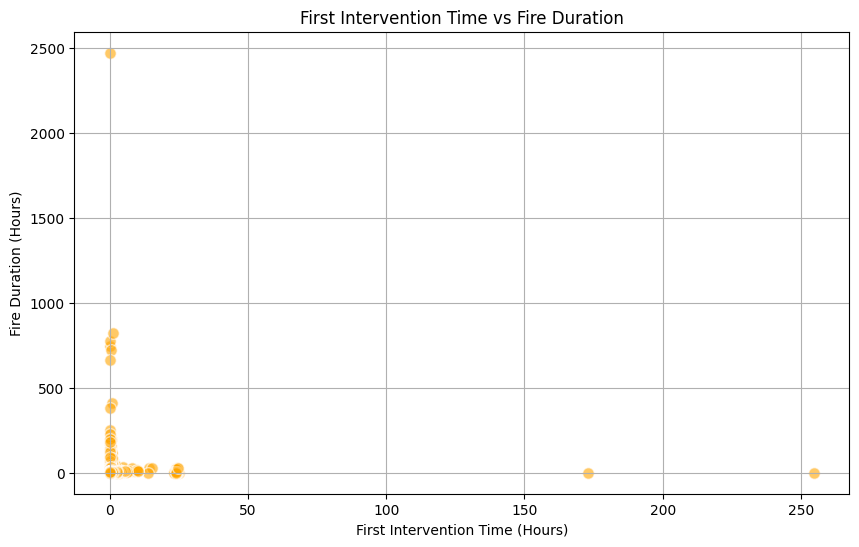

Correlation Coefficient: 0.02
P-Value: 2.85e-21


In [4]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate time to first intervention in hours
df['Intervention_Time_Hours'] = (df['DataHora_PrimeiraIntervencao'] - df['DataHoraAlerta']).dt.total_seconds() / 3600

# Ensure that the duration column is present and valid
df['Duracao_Horas'] = pd.to_numeric(df['Duracao_Horas'], errors='coerce')

# Drop rows with NaN values in Intervention_Time_Hours or Duracao_Horas
df = df.dropna(subset=['Intervention_Time_Hours', 'Duracao_Horas'])

# Scatter plot of first intervention time vs fire duration
plt.figure(figsize=(10, 6))
plt.scatter(df['Intervention_Time_Hours'], df['Duracao_Horas'],color='orange', alpha=0.6, edgecolors='w', s=70)
plt.xlabel('First Intervention Time (Hours)')
plt.ylabel('Fire Duration (Hours)')
plt.title('First Intervention Time vs Fire Duration')
plt.grid(True)
plt.show()

# Correlation analysis
correlation_coefficient, p_value = pearsonr(df['Intervention_Time_Hours'], df['Duracao_Horas'])
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-Value: {p_value:.2e}')
